# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.



Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [102]:
# Carregando todas as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Carregue os dados

In [103]:
# Carregue os arquivos de dados em diferentes DataFrames

users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [104]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [105]:
# Imprima uma amostra de dados dos planos
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Cada linha de dados descreve as informações sobre um plano (linha 1 - surf e linha 2 - ultimate)
temos 3 tipos de dados no df (float, object e int)
Não temos valores ausentes

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [106]:
#Não vejo problemas

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [107]:
#Acrescentando uma coluna com a quantidade de internet em GB

plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Usuários

In [108]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [109]:
# Imprima uma amostra de dados dos usuários

print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

As colunas reg_date e churn_date estão no formato de texto, precisam ser convertidas para o tipo datetime.
churn_date possui valores ausentes mas faz sentido pois significa que na data da extração os clientes ainda estavam ativos.
a coluna plan esta categorizada entre os dois planos (surf e ultimate).Transforma-la em um tipo catégorico facilitará as analises posteriores.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [110]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# Convertendo a coluna 'plan' para o tipo categórico
users['plan'] = users['plan'].astype('category')

print(users.info())

print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     10

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]



In [111]:
#criando faixas etarias para pode ser util para entender qual faixa etaria de clientes gera maior receita.

bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '51+']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

print(users.info())
print("\n")
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
 8   age_group   500 non-null    category      
dtypes: category(2), datetime64[ns](2), int64(2), object(3)
memory usage: 28.8+ KB
None


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36 

## Chamadas

In [112]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [113]:
# Imprima uma amostra de dados das chamadas

print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

A coluna call_date é formato object, porém para manipulação e análise de dados, é melhor que esteja em formato datetime.
Não há valores ausentes.
A coluna duration pode conter alguns problemas. Precisamos verificar que não tenham valores negativos e que estejam em minutos inteiros.Verificar se ha chamadas com duração zero e se esses registros podem ser excluidos ou se representam alguma informação importante.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [114]:
# Convertendo a coluna call_date para o tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Verificando chamadas com duração zero
zero_duration_calls = calls[calls['duration'] == 0]
print("\nNúmero de chamadas com duração zero:", len(zero_duration_calls))
print(zero_duration_calls.head())




Número de chamadas com duração zero: 26834
         id  user_id  call_date  duration
19   1001_4     1001 2018-12-05       0.0
25  1001_13     1001 2018-12-24       0.0
31  1001_30     1001 2018-10-17       0.0
32  1001_31     1001 2018-11-03       0.0
34  1001_35     1001 2018-12-21       0.0


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [115]:
# removendo chamadas com duração zero, pois esse número é pequeno comparado ao numero de dados do df.
calls = calls[calls['duration'] > 0]

calls['year_month'] = calls['call_date'].dt.to_period('M')

## Mensagens

In [116]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [117]:
# Imprima uma amostra dos dados das mensagens

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

As datas não estão no formato adequado. Não há valores ausentes.
Vale a pena verificar se há ou não valores duplicados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [118]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

print(messages.info())
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [119]:
# Para enriquecer os dados, podemos adicionar novas colunas agrupando por ano e mês, dia da semana e hora do dia:

messages['year_month'] = messages['message_date'].dt.to_period('M')  # Ano e Mês
messages['weekday'] = messages['message_date'].dt.weekday  # Dia da semana (0 = segunda-feira, 6 = domingo)
messages['hour'] = messages['message_date'].dt.hour  # Hora do dia

print(messages.head())

         id  user_id message_date year_month  weekday  hour
0  1000_125     1000   2018-12-27    2018-12        3     0
1  1000_160     1000   2018-12-31    2018-12        0     0
2  1000_223     1000   2018-12-31    2018-12        0     0
3  1000_251     1000   2018-12-27    2018-12        3     0
4  1000_255     1000   2018-12-26    2018-12        2     0


## Internet

In [120]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [121]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Coluna session_date não esta no formato datetime.
Não há valores ausentes.


### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [122]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [123]:
#mesmo raciocinio aplicado ao DF de mensagens
internet['year_month'] = internet['session_date'].dt.to_period('M')  # Ano e Mês
internet['weekday'] = internet['session_date'].dt.weekday  # Dia da semana (0 = segunda-feira, 6 = domingo)
internet['hour'] = internet['session_date'].dt.hour  # Hora do dia

print(internet.head())

         id  user_id session_date  mb_used year_month  weekday  hour
0   1000_13     1000   2018-12-29    89.86    2018-12        5     0
1  1000_204     1000   2018-12-31     0.00    2018-12        0     0
2  1000_379     1000   2018-12-28   660.40    2018-12        4     0
3  1000_413     1000   2018-12-26   270.99    2018-12        2     0
4  1000_442     1000   2018-12-27   880.22    2018-12        3     0


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [124]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print(plans.info())

print(plans.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_min


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
    
Você identificou os principais problemas dos dfs e os tratou a contento.
</div>


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [125]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_aggregated = calls.groupby(['user_id', 'year_month']).agg(total_calls=('id', 'count'))  

print(calls_aggregated)

                    total_calls
user_id year_month             
1000    2018-12              16
1001    2018-08              22
        2018-09              38
        2018-10              47
        2018-11              49
...                         ...
1498    2018-12              32
1499    2018-09              35
        2018-10              41
        2018-11              39
        2018-12              56

[2256 rows x 1 columns]


In [126]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

calls_aggregated = calls.groupby(['user_id', 'year_month']).agg(total_calls=('id', 'count'),total_minutes=('duration', 'sum')).reset_index()

print(calls_aggregated.head())

   user_id year_month  total_calls  total_minutes
0     1000    2018-12           16         116.83
1     1001    2018-08           22         171.14
2     1001    2018-09           38         297.69
3     1001    2018-10           47         374.11
4     1001    2018-11           49         404.59


In [127]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages_aggregated = messages.groupby(['user_id', 'year_month']).agg(total_messages=('id', 'count')).reset_index()

print(messages_aggregated.head())


   user_id year_month  total_messages
0     1000    2018-12              11
1     1001    2018-08              30
2     1001    2018-09              44
3     1001    2018-10              53
4     1001    2018-11              36


In [128]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_aggregated = internet.groupby(['user_id', 'year_month']).agg(total_internet=('mb_used', 'sum')).reset_index()

print(internet_aggregated.head())

   user_id year_month  total_internet
0     1000    2018-12         1901.47
1     1001    2018-08         6919.15
2     1001    2018-09        13314.82
3     1001    2018-10        22330.49
4     1001    2018-11        18504.30



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Agregações aconteceram adequadamente!
</div>


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [129]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

user_data = calls_aggregated.merge(messages_aggregated, on=['user_id', 'year_month'], how='outer')
user_data = user_data.merge(internet_aggregated, on=['user_id', 'year_month'], how='outer')

print(user_data.head())

   user_id year_month  total_calls  total_minutes  total_messages  \
0     1000    2018-12         16.0         116.83            11.0   
1     1001    2018-08         22.0         171.14            30.0   
2     1001    2018-09         38.0         297.69            44.0   
3     1001    2018-10         47.0         374.11            53.0   
4     1001    2018-11         49.0         404.59            36.0   

   total_internet  
0         1901.47  
1         6919.15  
2        13314.82  
3        22330.49  
4        18504.30  


In [130]:
# Adicione as informações sobre o plano

user_data = user_data.merge(users[['user_id', 'plan', 'city']], on='user_id', how='outer')

print(user_data.head())

   user_id year_month  total_calls  total_minutes  total_messages  \
0     1000    2018-12         16.0         116.83            11.0   
1     1001    2018-08         22.0         171.14            30.0   
2     1001    2018-09         38.0         297.69            44.0   
3     1001    2018-10         47.0         374.11            53.0   
4     1001    2018-11         49.0         404.59            36.0   

   total_internet      plan                                   city  
0         1901.47  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA  
1         6919.15      surf        Seattle-Tacoma-Bellevue, WA MSA  
2        13314.82      surf        Seattle-Tacoma-Bellevue, WA MSA  
3        22330.49      surf        Seattle-Tacoma-Bellevue, WA MSA  
4        18504.30      surf        Seattle-Tacoma-Bellevue, WA MSA  


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Temos um problema por aqui.
    
Não necessariamente todos os clientes estãrão presentes em todos os dfs que você está juntando. Dessa forma devemos usar o outer join para não deixarmos usuários pelo caminho.
    
Como esse resultado deve impactar todas as sessões posteriores, peço que as revise e retomaresmos a revisão a partir daqui na próxima iteração, combinado?
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [131]:
# Calcule a receita mensal para cada usuário

#Primeiro: função para calcular a receita mensal com base no plano - taxa fixa

def calculate_revenue(row):
    
    if row['plan'] == 'surf':
        base_fee = 20  
        extra_minute_cost = 0.03
        extra_message_cost = 0.03
        extra_data_cost = 10  
        included_minutes = 500
        included_messages = 50
        included_data_gb = 15
    else:  
        base_fee = 70 
        extra_minute_cost = 0.01
        extra_message_cost = 0.01
        extra_data_cost = 7  
        included_minutes = 3000
        included_messages = 1000
        included_data_gb = 30
        
#Segundo: calculando o valor excedente para mensagem, internet e ligações:
    excess_minutes = max(0, row['total_minutes'] - included_minutes)
    excess_messages = max(0, row['total_messages'] - included_messages)
    excess_data_gb = max(0, (row['total_internet'] / 1024) - included_data_gb) 
    
#Terceiro: valor da receita total

    revenue = base_fee + (excess_minutes * extra_minute_cost) + (excess_messages * extra_message_cost) + (excess_data_gb * extra_data_cost)

    return revenue

#Quarto: Calculando a receita por usuario

user_data['monthly_revenue'] = user_data.apply(calculate_revenue, axis=1)

print(user_data[['user_id', 'year_month', 'plan', 'monthly_revenue']].head())

   user_id year_month      plan  monthly_revenue
0     1000    2018-12  ultimate        70.000000
1     1001    2018-08      surf        20.000000
2     1001    2018-09      surf        20.000000
3     1001    2018-10      surf        88.161191
4     1001    2018-11      surf        50.706055


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Cálculo da receita realizado.
</div>



## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

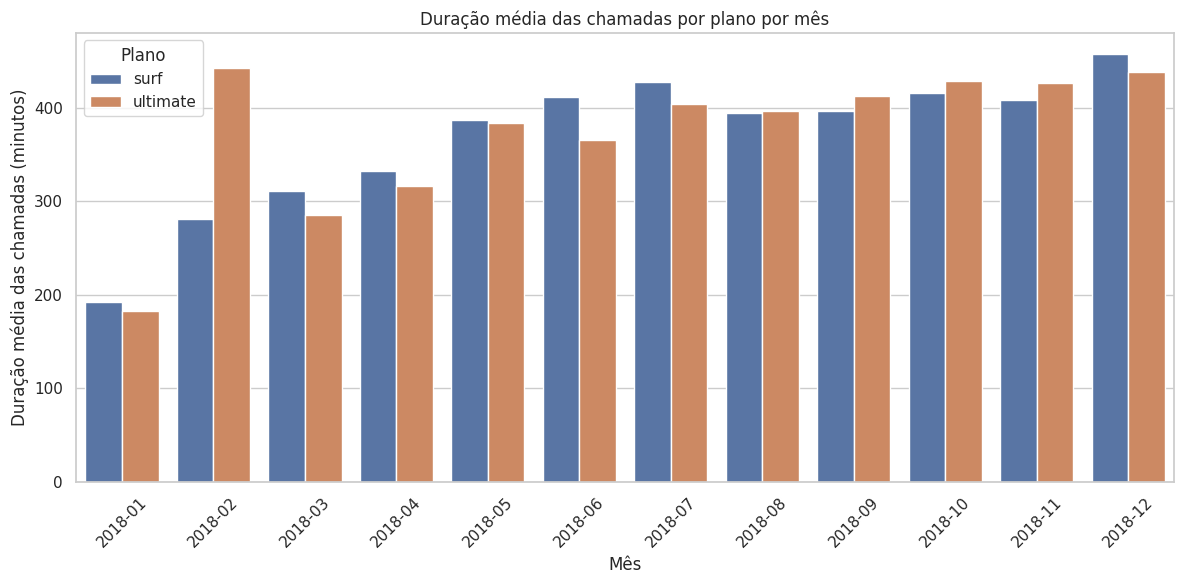

In [132]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

avg_call_duration = user_data.groupby(['plan', 'year_month'])['total_minutes'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='year_month', y='total_minutes', hue='plan')

plt.title('Duração média das chamadas por plano por mês')
plt.xlabel('Mês')
plt.ylabel('Duração média das chamadas (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()

plt.show()


No handles with labels found to put in legend.


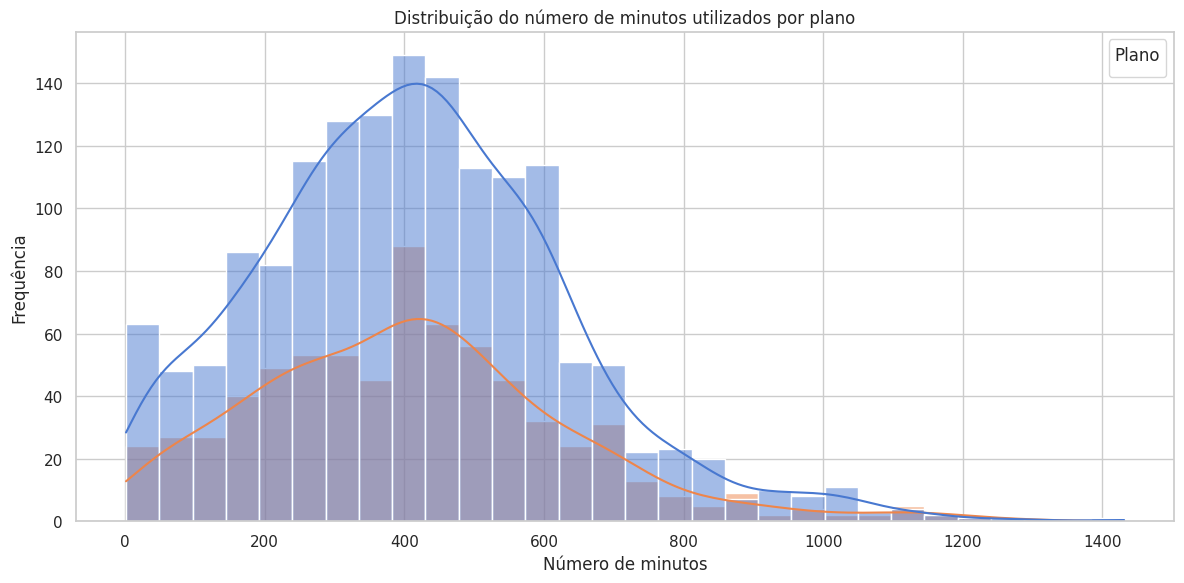

In [133]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(data=user_data, x='total_minutes', hue='plan', bins=30, kde=True, palette='muted')

plt.title('Distribuição do número de minutos utilizados por plano')
plt.xlabel('Número de minutos')
plt.ylabel('Frequência')
plt.legend(title='Plano')
plt.tight_layout()

plt.show()


[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [134]:
# Calcule a média e a variância da duração mensal das chamadas
call_stats = user_data.groupby(['plan', 'year_month'])['total_minutes'].agg(['mean', 'var', 'std']).reset_index()

print(call_stats.head())


   plan year_month        mean           var         std
0  surf    2018-01  192.840000  14795.440200  121.636508
1  surf    2018-02  280.851111  46959.219961  216.700761
2  surf    2018-03  310.970000  31821.317991  178.385308
3  surf    2018-04  332.380000  45615.666796  213.578245
4  surf    2018-05  387.108000  50778.127459  225.340026


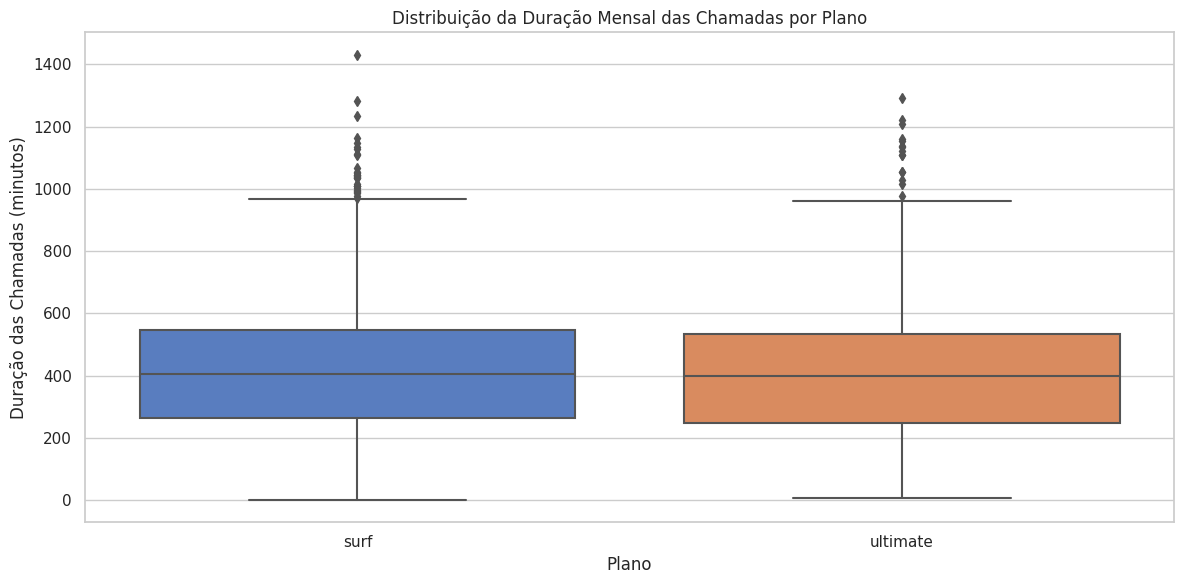

In [135]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_data, x='plan', y='total_minutes', palette='muted')
plt.title('Distribuição da Duração Mensal das Chamadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Duração das Chamadas (minutos)')
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

Conclusões:
-A duração das chamadas do plano ultimate é menor
-A mediana para os dois planos é igual


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Chamadas investigadas conforme roteiro.
</div>



### Mensagens

In [136]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês


In [137]:
#calculando média e variância para mensagens:
messages_stats = user_data.groupby('plan')['total_messages'].agg(['mean', 'var', 'std']).reset_index()
print(messages_stats)


       plan       mean          var        std
0      surf  40.109656  1091.344231  33.035500
1  ultimate  46.296233  1085.183108  32.942118


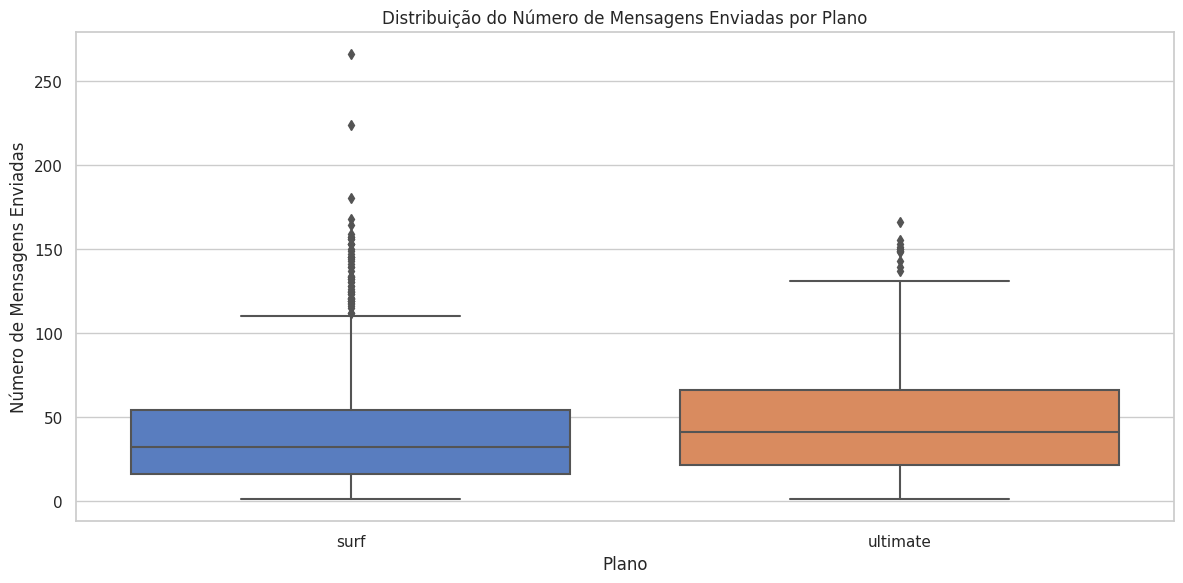

In [138]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_data, x='plan', y='total_messages', palette='muted')
plt.title('Distribuição do Número de Mensagens Enviadas por Plano')
plt.xlabel('Plano')
plt.ylabel('Número de Mensagens Enviadas')
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários costumam enviar mensagens. O comportamento é diferente dependendo do plano?]

Conclusões:
A média de mensagens enviadas é maior no plano ultimate.
A variância das mensagens enviadas é semelhante entre os dois planos.
Para o plano surf, a média de mensagens enviadas está proxima ao limite do plano.


### Internet

In [139]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por pla

In [140]:
# Calcular a média e a variância do consumo de internet por plano
internet_stats = user_data.groupby('plan')['total_internet'].agg(['mean', 'var']).reset_index()
print(internet_stats)

       plan          mean           var
0      surf  16717.702137  6.216823e+07
1  ultimate  17238.642253  6.132485e+07


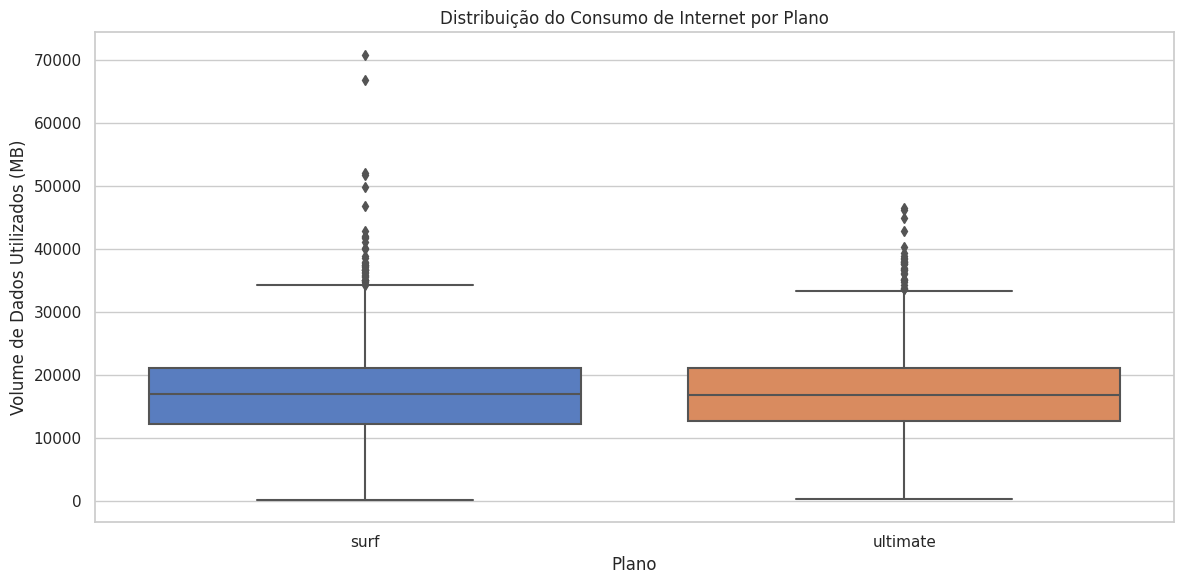

In [141]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_data, x='plan', y='total_internet', palette='muted')
plt.title('Distribuição do Consumo de Internet por Plano')
plt.xlabel('Plano')
plt.ylabel('Volume de Dados Utilizados (MB)')
plt.tight_layout()
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]
Conclusões:
O plano ultimate possui média de consumo de dados um pouco maior em comparação ao surf.
Em relação a variância, a mesma é praticamente igual nos dois planos, indicando que o comportamento dos usuários em relação ao uso de dados similar.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Mensagens e internet investigadas conforme roteiro.
</div>



## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [142]:
# Calcular a média e a variância da receita por plano
receitas_stats = user_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()
print(receitas_stats)


       plan       mean          var
0      surf  57.152072  2881.833931
1  ultimate  72.104389   115.351123


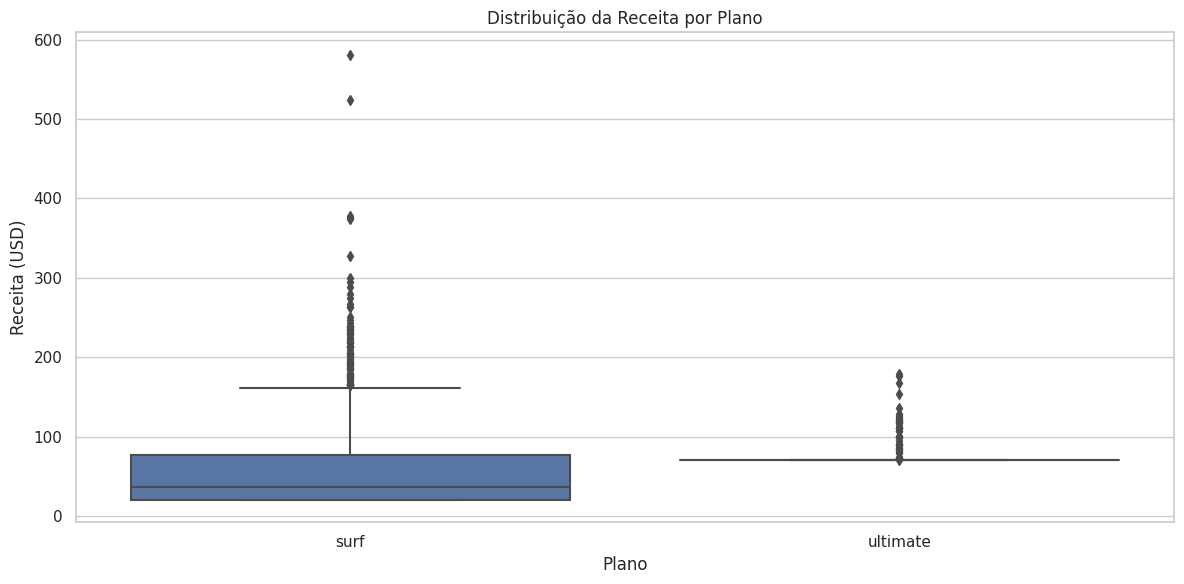

In [143]:
# Diagrama de caixa para a receita por plano
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_data, x='plan', y='monthly_revenue')
plt.title('Distribuição da Receita por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita (USD)')
plt.tight_layout()
plt.show()

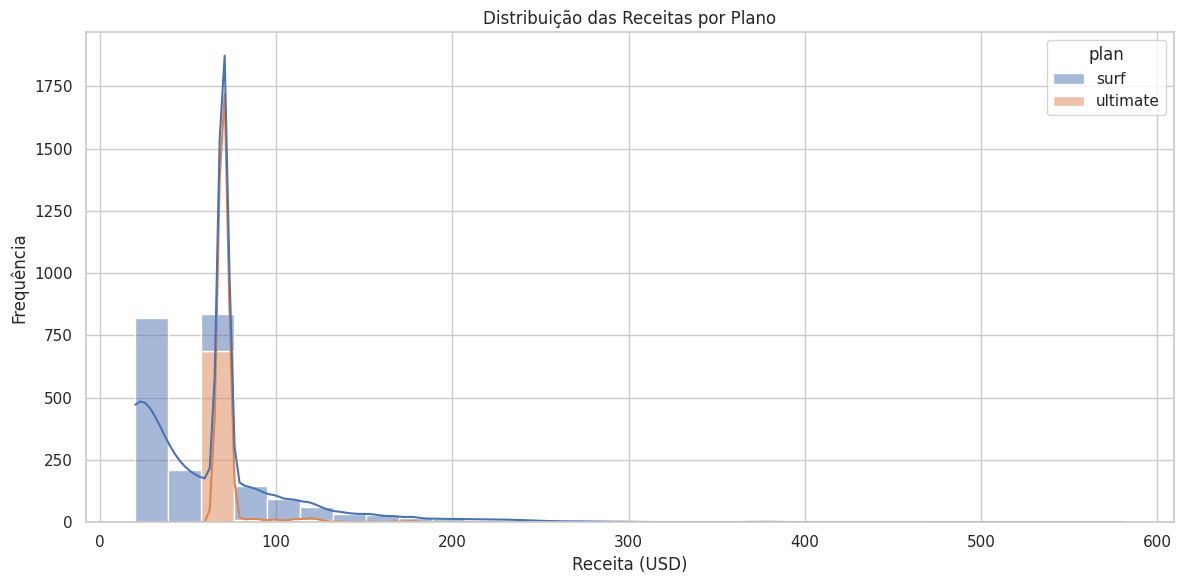

In [144]:
#histograma para a distribuição da receita por plano
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data, x='monthly_revenue', hue='plan', multiple='stack', kde=True, bins=30)
plt.title('Distribuição das Receitas por Plano')
plt.xlabel('Receita (USD)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

[Formule conclusões sobre como a receita difere entre os planos.]

Conclusões:
O plano ultimate gera, em média, mais receita por usuário.
O plano surf tem uma variância muito maior, indicando que as receitas dos usuários podem variar mais significativamente.
O plano ultimate tem uma variância muito baixa, sugerindo que a receita gerada é mais estável e previsível.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Receita avaliada com visualizações e conclusão adequadas.
</div>



## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]


Hipótese Nula (H0): A receita média dos usuários do plano Ultimate é igual à receita média dos usuários do plano Surf.

Hipótese Alternativa (H1): A receita média dos usuários do plano Ultimate é diferente da receita média dos usuários do plano Surf.

Teste estatistico escolhido: Teste t, pois são duas amostras independentes
alfa = 0,05

In [145]:
# Teste as hipóteses
receita_surf = user_data[user_data['plan']== 'surf']['monthly_revenue']
receita_ultimate =user_data[user_data['plan']== 'ultimate']['monthly_revenue']
mean_surf= receita_surf.mean()
mean_ultimate = receita_ultimate.mean()
# Teste t de duas amostras independentes
t_stat, p_value = stats.ttest_ind(receita_surf, receita_ultimate, equal_var=False)

# Exibir resultados
print(f'Média do plano Surf: {mean_surf:.2f}')
print(f'Média do plano Ultimate: {mean_ultimate:.2f}')
print(f'Valor p: {p_value:.4f}')

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: As receitas médias dos planos são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas receitas médias dos planos.")

Média do plano Surf: 57.15
Média do plano Ultimate: 72.10
Valor p: 0.0000
Rejeitamos a hipótese nula: As receitas médias dos planos são significativamente diferentes.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Hipótese Nula (H0): A receita média dos usuários da área NY-NJ é igual à receita média dos usuários das demais regiões.
Hipótese Alternativa (H1): A receita média dos usuários da área NY-NJ é diferente da receita média dos usuários das demais regiões.
Teste estatistico escolhido: Teste t, pois são duas amostras independentes alfa = 0,05

In [148]:
# Teste as hipóteses

# Filtrar os dados para NY-NJ e outras regiões
ny_nj_users = user_data[user_data['city'].str.contains('NY-NJ')]  
other_regions_users = user_data[~user_data['city'].str.contains('NY-NJ')]  

# Receitas mensais dos dois grupos
receita_ny_nj = ny_nj_users['monthly_revenue']
receita_outros = other_regions_users['monthly_revenue']

# Calcular médias e desvios padrão
mean_ny_nj = receita_ny_nj.mean()
mean_outros = receita_outros.mean()

std_ny_nj = receita_ny_nj.std()
std_outros = receita_outros.std()

n_ny_nj = len(receita_ny_nj)
n_outros = len(receita_outros)

# Teste t de duas amostras independentes
t_stat, p_value = stats.ttest_ind(receita_ny_nj, receita_outros, equal_var=False)

# Exibir resultados
print(f'Média dos usuários de NY-NJ: {mean_ny_nj:.2f}')
print(f'Média dos usuários de outras regiões: {mean_outros:.2f}')
print(f'Estatística t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')

# Interpretação do teste
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: As receitas médias dos usuários de NY-NJ e outras regiões são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nas receitas médias dos usuários de NY-NJ e outras regiões.")

Média dos usuários de NY-NJ: 57.22
Média dos usuários de outras regiões: 62.76
Estatística t: -2.30
Valor p: 0.0217
Rejeitamos a hipótese nula: As receitas médias dos usuários de NY-NJ e outras regiões são significativamente diferentes.


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>
